<a href="https://colab.research.google.com/github/OscarRojasG/OCR/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

The dataset contains 26 folders (A-Z) containing handwritten images in size 28x28 pixels, each alphabet in the image is centre fitted to 20x20 pixel box.

Each image is stored as Gray-level

https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/

## Cargar dataset completo

No recomendable... se agota la RAM de colab y tarda demasiado en cargar.

Se recomienda reducir el volumen del dataset (revisar sección "Exportar").

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("A_Z Handwritten Data.csv", header=None, dtype=np.uint8, nrows=10000)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Cargar muestra

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("sample.csv", dtype=np.uint8, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,0,0,0,0,0,0,0,0,0,...,0,98,255,233,31,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,77,135,27,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,68,161,101,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,166,183,31,0


In [2]:
from PIL import Image as Img

pixels = df.iloc[0].to_numpy()[1:]
pixels = np.reshape(pixels, (20, 20))

img = Img.fromarray(pixels)
img

In [3]:
def draw_image(pixel_arr, width, height):
    pixels = np.reshape(pixel_arr, (height, width))
    img = Img.fromarray(pixels)

    bio = BytesIO()
    img.save(bio, format='png')
    return display(Image(bio.getvalue(), format='png'))

## Exportar

Funciones para exportar dataset con 1000 filas por clase.

In [ ]:
letters = np.zeros(shape=(26, 1000, 785))

In [ ]:
# Asegurarse que todas las clases tengan 1000 datos como mínimo
df.iloc[:, 0].value_counts()

0     1000
1     1000
24    1000
23    1000
22    1000
21    1000
20    1000
19    1000
18    1000
17    1000
16    1000
15    1000
14    1000
13    1000
12    1000
11    1000
10    1000
9     1000
8     1000
7     1000
6     1000
5     1000
4     1000
3     1000
2     1000
25    1000
Name: 0, dtype: int64

In [ ]:
for letter in range(26):
    arr = df[df.iloc[:, 0] == letter].to_numpy()
    arr = arr[:1000]
    letters[letter] = arr

In [ ]:
flt_arr = letters.reshape(26000, 785)
np.savetxt("sample.csv", flt_arr.astype(int), fmt='%i', delimiter=",")

## Aplicar bounding box a dataset

In [ ]:
out_box_cols = []

for i in range(1, 785):
    x = (i-1) % 28
    y = (i-1) // 28

    # Pixeles fuera del centro de 20x20
    if x < 4 or x > 23 or y < 4 or y > 23:
        out_box_cols.append(i)

In [ ]:
sum = 0

# Casillas no negras fuera del centro
for col in out_box_cols:
    sum += 26000 - df.iloc[:, col].value_counts()[0]

sum

885

Vemos que existe algo de ruido en las imágenes, pero si eliminamos estas casillas no debería afectar mucho...

In [ ]:
# 28x28 - 20x20
len(out_box_cols)

384

In [ ]:
df_box = df.drop(df.columns[out_box_cols], axis=1)

In [ ]:
pixels = df_box.iloc[0].to_numpy()[1:]
pixels = np.reshape(pixels, (20, 20))

img = Img.fromarray(pixels)
img

In [ ]:
df_box_arr = df_box.to_numpy()
np.savetxt("sample.csv", df_box_arr.astype(int), fmt='%i', delimiter=",")

# Modelo

In [57]:
from sklearn.model_selection import train_test_split

Y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

Creación del modelo

In [58]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(100, activation='sigmoid', input_shape=(400,)))
model.add(layers.Dense(26, activation='sigmoid'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Entrenamiento

In [59]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
650/650 [==============================] - 2s 3ms/step - loss: 1.9346 - accuracy: 0.5213
Epoch 2/100
650/650 [==============================] - 2s 3ms/step - loss: 1.0842 - accuracy: 0.7269
Epoch 3/100
650/650 [==============================] - 2s 4ms/step - loss: 0.8814 - accuracy: 0.7687
Epoch 4/100
650/650 [==============================] - 2s 2ms/step - loss: 0.8138 - accuracy: 0.7801
Epoch 5/100
650/650 [==============================] - 2s 3ms/step - loss: 0.7643 - accuracy: 0.7855
Epoch 6/100
650/650 [==============================] - 2s 2ms/step - loss: 0.7342 - accuracy: 0.7932
Epoch 7/100
650/650 [==============================] - 2s 3ms/step - loss: 0.6926 - accuracy: 0.8025
Epoch 8/100
650/650 [==============================] - 2s 3ms/step - loss: 0.6832 - accuracy: 0.8030
Epoch 9/100
650/650 [==============================] - 2s 2ms/step - loss: 0.6707 - accuracy: 0.8076
Epoch 10/100
650/650 [==============================] - 2s 4ms/step - loss: 0.6337 - accura

Validación con datos de prueba: entropía categórica - accuracy

In [60]:
model.evaluate(X_test, Y_test, verbose=False)

[0.39372581243515015, 0.8896153569221497]

In [78]:
def predict(image_arr):
    prob = model.predict(np.array([image_arr]))
    pred = prob.argmax()
    letter = chr(ord('A') + pred)

    print(letter)
    return draw_image(image_arr, 20, 20)

In [80]:
for i in range(10):
    predict(X_test[i])

1/1 [==============================] - 0s 24ms/step
S


1/1 [==============================] - 0s 23ms/step
C


1/1 [==============================] - 0s 25ms/step
M


1/1 [==============================] - 0s 22ms/step
M


1/1 [==============================] - 0s 22ms/step
U


1/1 [==============================] - 0s 22ms/step
Q


1/1 [==============================] - 0s 22ms/step
S


1/1 [==============================] - 0s 21ms/step
K


1/1 [==============================] - 0s 21ms/step
D


1/1 [==============================] - 0s 28ms/step
E


# Procesamiento de imágenes

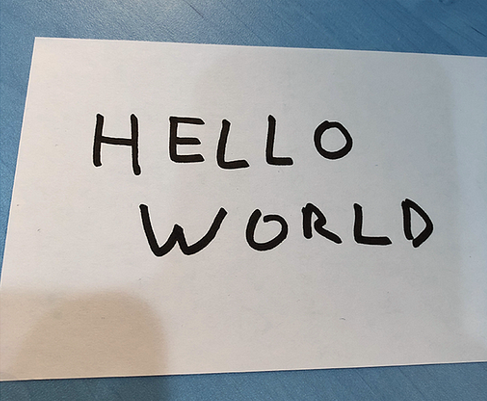

In [46]:
import cv2

img = cv2.imread('hello.png')
img.astype("uint8")
Img.fromarray(img)

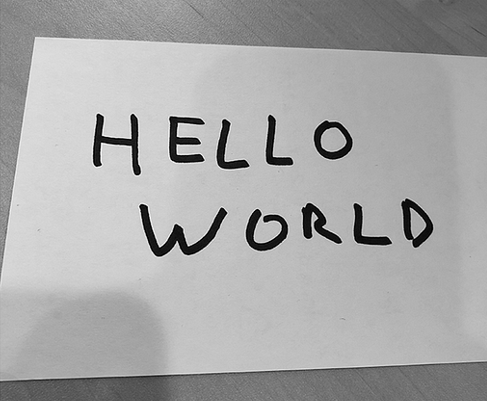

In [47]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Img.fromarray(gray)

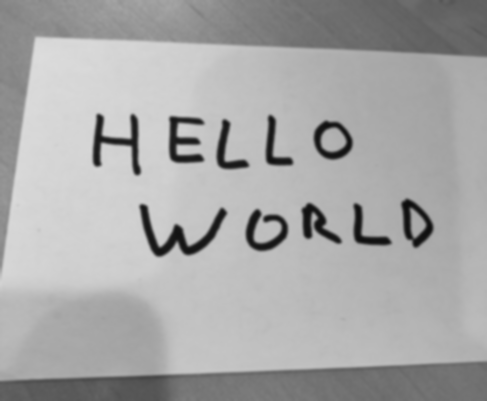

In [48]:
blur = cv2.GaussianBlur(gray, (7,7), 0)
Img.fromarray(blur)

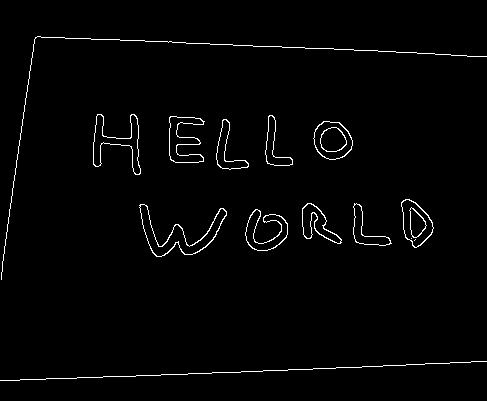

In [49]:
edges = cv2.Canny(blur, 30, 150)
Img.fromarray(edges)

Obtener contornos y dibujar bordes (solo para propósitos ilustrativos)

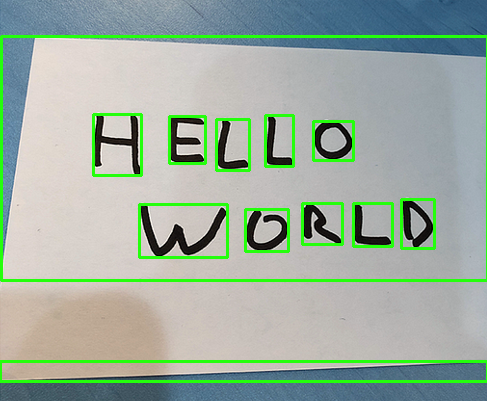

In [50]:
from imutils.contours import sort_contours

# Obtener contornos
contours = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0]

img2 = img.copy()
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (36,255,12), 2)
Img.fromarray(img2)

Eliminar bordes demasiado anchos o altos

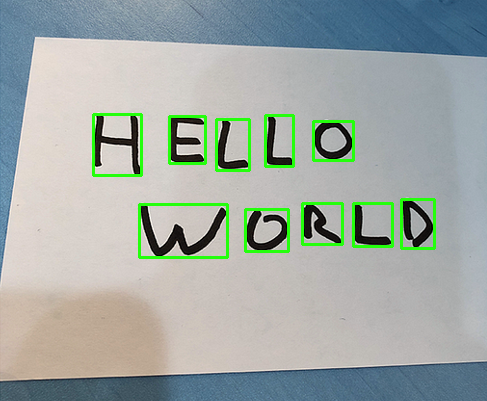

In [54]:
valid_cts = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
        valid_cts.append(c)

for c in valid_cts:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (36,255,12), 2)
Img.fromarray(img)

Ordenar contornos de arriba a abajo y de izquierda a derecha

In [55]:
from collections import OrderedDict

tol = 20 # Desviación máxima en posición y promedio
lines = OrderedDict()

# Ordenar líneas
for c in valid_cts:
    x, y, w, h = cv2.boundingRect(c)

    y_mean = (y+y+h)/2
    added = False

    for key, value in lines.items():
        if abs(y_mean - key) < tol:
            lines[key].append(c)
            added = True
            break

    if added == False:
        lines[y_mean] = [c]

sorted_cts = []

# Ordenar de izquierda a derecha
for key, value in lines.items():
    lines[key] = sorted(lines[key], key=lambda c: cv2.boundingRect(c)[0], reverse=True)

    # Juntar todos los contornos en un arreglo
    for c in lines[key]:
        sorted_cts.insert(0, c)

Obtener caracteres y ajustar tamaño

In [87]:
from io import BytesIO
from IPython.display import display, Image

letters = []

for c in sorted_cts:
    # Obtener contorno
    x, y, w, h = cv2.boundingRect(c)
    box = gray[y:y+h, x:x+w]

    # Invertir colores
    thresh = cv2.threshold(box, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Obtener largo y ancho
    tH, tW = thresh.shape

    # Redimensionar a 20x20
    resized = cv2.resize(thresh, (20,20))

    # Convertir matriz a arreglo
    image_arr = np.ravel(resized)

    # Agregar a arreglo de letras (imágenes)
    letters.append(image_arr)

    # Mostrar por pantalla
    print(x, y, w, h)
    draw_image(resized, 20, 20)

93 114 48 61


169 116 36 47


216 119 33 51


265 115 28 51


313 121 40 39


139 204 88 53


245 209 43 42


302 203 40 41


353 203 39 43


401 199 33 49


Funciona!!!

In [88]:
for i in range(len(letters)):
    predict(letters[i])

1/1 [==============================] - 0s 34ms/step
H


1/1 [==============================] - 0s 33ms/step
E


1/1 [==============================] - 0s 58ms/step
L


1/1 [==============================] - 0s 91ms/step
L


1/1 [==============================] - 0s 32ms/step
O


1/1 [==============================] - 0s 26ms/step
W


1/1 [==============================] - 0s 28ms/step
O


1/1 [==============================] - 0s 23ms/step
R


1/1 [==============================] - 0s 24ms/step
L


1/1 [==============================] - 0s 27ms/step
D
